# 문서 유사도 (Document Similarity)

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
import os, glob

path = 'data/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, '*.data'))

filename_list = []
opinions_list = []

for file_ in all_files:
    df = pd.read_table(file_, header=None, index_col=None, encoding='latin1')
    # display(df)

    # 파일명
    filename = file_.split('/')[-1]
    filename = filename.split('.')[0]
    filename_list.append(filename)

    # 의견 내용
    opinions = df.to_string(index=False, header=False)
    opinions_list.append(opinions)

document_df = pd.DataFrame({
    'filename': filename_list,
    'opinions': opinions_list
})

document_df

,filename,opinions
0,battery-life_ipod_nano_8gb,...
1,gas_mileage_toyota_camry_2007,...
2,room_holiday_inn_london,...
3,location_holiday_inn_london,...
4,staff_bestwestern_hotel_sfo,...
5,voice_garmin_nuvi_255W_gps,...
6,speed_garmin_nuvi_255W_gps,...
7,size_asus_netbook_1005ha,...
8,screen_garmin_nuvi_255W_gps,...
9,battery-life_amazon_kindle,...


In [71]:
import string
import nltk
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    # 소문자 변환
    text = text.lower()

    # 특수문자 변환 (제거)
    punc_rem_dict = dict((ord(ch), None) for ch in string.punctuation)
    text = text.translate(punc_rem_dict)

    # 토큰화
    tokens = nltk.word_tokenize(text)

    # 어근분리
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=lemmatize,
    stop_words='english',
    ngram_range=(1, 2),
    max_df=0.85,
    min_df=0.05
)

opinions_vecs = tfidf_vectorizer.fit_transform(document_df['opinions'])

/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn(


In [73]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, max_iter=5000, random_state=0)
document_df['cluster'] = kmeans.fit_predict(opinions_vecs)
document_df

,filename,opinions,cluster
0,battery-life_ipod_nano_8gb,...,1
1,gas_mileage_toyota_camry_2007,...,2
2,room_holiday_inn_london,...,3
3,location_holiday_inn_london,...,0
4,staff_bestwestern_hotel_sfo,...,3
5,voice_garmin_nuvi_255W_gps,...,1
6,speed_garmin_nuvi_255W_gps,...,1
7,size_asus_netbook_1005ha,...,1
8,screen_garmin_nuvi_255W_gps,...,1
9,battery-life_amazon_kindle,...,1


In [83]:
hotel_index = document_df[document_df['cluster'] == 3].index
print(hotel_index.shape)
print(hotel_index)

base_index = 2
document_df.iloc[base_index]

(9,)
Index([2, 4, 20, 30, 31, 39, 46, 49, 50], dtype='int64')


filename                              room_holiday_inn_london
opinions                                                  ...
cluster                                                     3
Name: 2, dtype: object

In [79]:
from sklearn.metrics.pairwise import cosine_similarity

# print(opinions_vecs[base_index].shape , opinions_vecs.shape)
opinions_sim = cosine_similarity(opinions_vecs[base_index], opinions_vecs)
opinions_sim

array([[0.01073839, 0.01655907, 1.        , 0.20507405, 0.22850597,
        0.01576703, 0.01547786, 0.09947407, 0.02337167, 0.01937718,
        0.0172593 , 0.02083343, 0.03436286, 0.40138763, 0.01758391,
        0.02114053, 0.2692457 , 0.16421489, 0.06145142, 0.02495391,
        0.2123026 , 0.02448409, 0.02747141, 0.01500771, 0.0144878 ,
        0.0341336 , 0.02300908, 0.41943153, 0.32127155, 0.03781394,
        0.86210778, 0.51119681, 0.16195799, 0.01713678, 0.02176438,
        0.01487123, 0.02971814, 0.03958565, 0.02276012, 0.17050683,
        0.02973712, 0.05511389, 0.02243793, 0.09251903, 0.03313425,
        0.04207267, 0.90728633, 0.02756497, 0.02010996, 0.11223669,
        0.12165299]])

In [80]:
opinions_sorted_idx = opinions_sim.argsort()[:, ::-1]   # 내림차순 정렬 (유사도 높은순)
opinions_sorted_idx = opinions_sorted_idx[:, 1:]        # 자기자신 제외
opinions_sorted_idx = opinions_sorted_idx.reshape(-1)   # 1차원으로 변형

result_df = document_df.iloc[opinions_sorted_idx][['filename', 'cluster']]
opinions_sim = opinions_sim.reshape(-1)
result_df['similarity'] = opinions_sim[opinions_sorted_idx]
result_df

,filename,cluster,similarity
46,rooms_bestwestern_hotel_sfo,3,0.907286
30,rooms_swissotel_chicago,3,0.862108
31,bathroom_bestwestern_hotel_sfo,3,0.511197
27,service_holiday_inn_london,0,0.419432
13,service_swissotel_hotel_chicago,0,0.401388
28,price_holiday_inn_london,0,0.321272
16,service_bestwestern_hotel_sfo,0,0.269246
4,staff_bestwestern_hotel_sfo,3,0.228506
20,staff_swissotel_chicago,3,0.212303
3,location_holiday_inn_london,0,0.205074


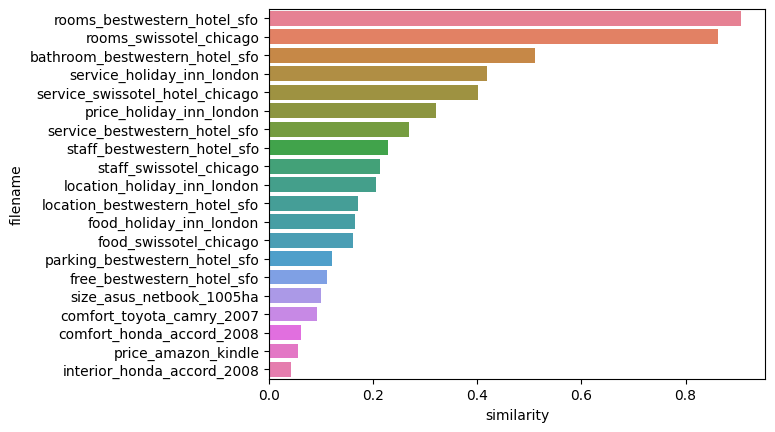

In [81]:
sns.barplot(x='similarity', y='filename', data=result_df.iloc[:20], hue='filename')
plt.show()

/var/folders/3n/_m4swqjn32qg1gw1xlfsyvx00000gn/T/ipykernel_7898/3084549245.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_sim_df['similarity'] = target_sim_val


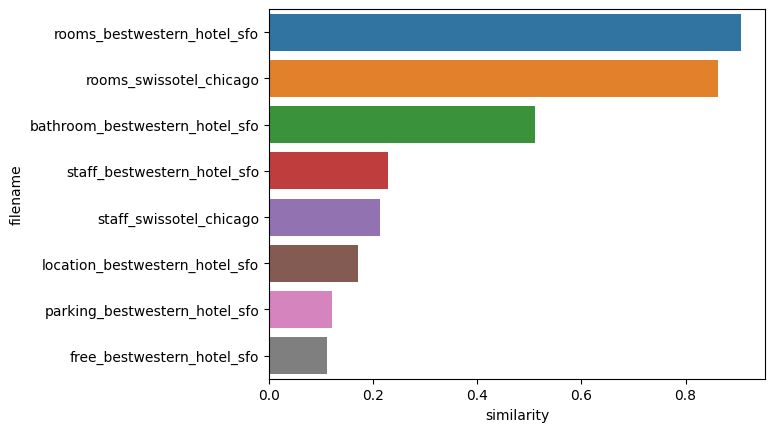

In [88]:
# 호텔관련 리뷰 추출
hotel_idx = document_df[document_df['cluster'] == 3].index

# 기준이 될 문서를 0번째 문서 지정(추출된 호첼 관련 리뷰중)
base_idx = hotel_idx[0]
document_df.iloc[base_idx]

# 호텔관련 리뷰 중 유사도 높은 순으로 정렬
target_sim = cosine_similarity(opinions_vecs[base_idx], opinions_vecs[hotel_idx])
target_sim_sorted_idx = target_sim.argsort()[:, ::-1]
target_sim_sorted_idx = target_sim_sorted_idx[:, 1:]

hotel_sorted_idx = hotel_idx[target_sim_sorted_idx.reshape(-1)]

target_sim_val = np.sort(target_sim.reshape(-1))[::-1]
target_sim_val = target_sim_val[1:]

hotel_sim_df = document_df.iloc[hotel_sorted_idx]
hotel_sim_df['similarity'] = target_sim_val

# 시각화
sns.barplot(x='similarity', y='filename', data=hotel_sim_df, hue='filename')
plt.show()
